# Welcome to this beautiful tutorial of this humble repo

Use the cell below to download data (<50 mb in total)

In [4]:
!mkdir -p tutorial/data
!wget -O tutorial/data/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5 https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_granulocyte_sorted_3k/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5
!wget -O tutorial/data/pbmc_granulocyte_sorted_3k_atac_peak_annotation.tsv https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_granulocyte_sorted_3k/pbmc_granulocyte_sorted_3k_atac_peak_annotation.tsv

If on Windows or command did do anything, use this

In [ ]:
%%bash
mkdir -p tutorial/data
wget -O tutorial/data/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5 https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_granulocyte_sorted_3k/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5
wget -O tutorial/data/pbmc_granulocyte_sorted_3k_atac_peak_annotation.tsv https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_granulocyte_sorted_3k/pbmc_granulocyte_sorted_3k_atac_peak_annotation.tsv

In [1]:
from scgog.data_preprocessing import *
from scgog.visualization import *
from scgog.data_loader import *
from scgog.benchmarking_ml_models import *

c:\Users\Dorzhey\anaconda3\envs\scgog_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Let's preprocess data and save it for the future use

In [2]:
data_path = "tutorial/data/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5"
ann_path = "tutorial/data/pbmc_granulocyte_sorted_3k_atac_peak_annotation.tsv"
mdata = preprocess_omics_data(data_path, ann_path)

Added `interval` annotation for features from tutorial/data/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5
After reading object has  2711 observations 134920 variables
After make_unique object has  2711 observations 134920 variables
After quality control object has  2391 observations 134920 variables


c:\Users\Dorzhey\anaconda3\envs\scgog_env\Lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


After normalization object has  2391 observations 134920 variables
After merging with annotation object has  2391 observations 134920 variables


# From here you can do any of these two

Clustering and creating figure of it

c:\Users\Dorzhey\anaconda3\envs\scgog_env\Lib\site-packages\pynndescent\pynndescent_.py:346: NumbaWarning: Cannot cache compiled function "init_rp_tree" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_rp_tree(data, dist, current_graph, leaf_array)
c:\Users\Dorzhey\anaconda3\envs\scgog_env\Lib\site-packages\pynndescent\pynndescent_.py:348: NumbaWarning: Cannot cache compiled function "init_random" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_random(n_neighbors, data, current_graph, dist, rng_state)
c:\Users\Dorzhey\anaconda3\envs\scgog_env\Lib\site-packages\pynndescent\pynndescent_.py:358: NumbaWarning: Cannot cache compiled function "process_candidates" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  nn_descent_internal_low_memory_parallel(
c:\Users\Dorzhey\anaconda3\envs\scgog_env\Lib\site-packages\pynndescent\pynndescent_.py:346: NumbaWarning: Cannot cache compiled function "init

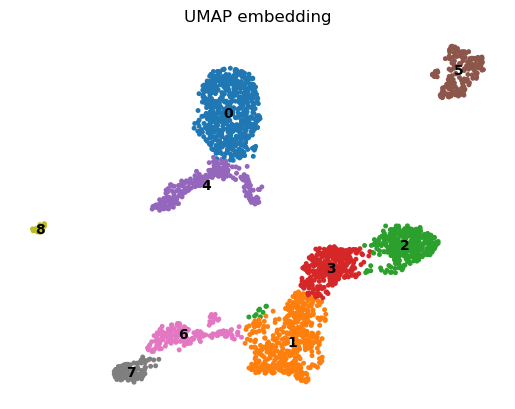

In [3]:
# Would you like compilated figure to be saved? If not it will be shown
saved = False
file_path = visualize_umap(mdata, saved)

Benchmarking ML models

In [3]:
# provide name of target variable
# what we have in annotation most often is gene
label ='peak_type'
batch_size = 32
shuffle = True
benchmark_models(mdata,  batch_size, shuffle)

c:\Users\Dorzhey\anaconda3\envs\scgog_env\Lib\site-packages\pynndescent\pynndescent_.py:346: NumbaWarning: Cannot cache compiled function "init_rp_tree" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_rp_tree(data, dist, current_graph, leaf_array)
c:\Users\Dorzhey\anaconda3\envs\scgog_env\Lib\site-packages\pynndescent\pynndescent_.py:348: NumbaWarning: Cannot cache compiled function "init_random" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_random(n_neighbors, data, current_graph, dist, rng_state)
c:\Users\Dorzhey\anaconda3\envs\scgog_env\Lib\site-packages\pynndescent\pynndescent_.py:358: NumbaWarning: Cannot cache compiled function "process_candidates" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  nn_descent_internal_low_memory_parallel(
c:\Users\Dorzhey\anaconda3\envs\scgog_env\Lib\site-packages\pynndescent\pynndescent_.py:346: NumbaWarning: Cannot cache compiled function "init

                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.285714   0.285714  0.285714  0.285714
1    Gradient Boosting  0.428571   0.238095  0.428571  0.300000
2                  SVC  0.285714   0.081633  0.285714  0.126984
3  Logistic Regression  0.428571   0.226190  0.428571  0.285714


c:\Users\Dorzhey\anaconda3\envs\scgog_env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
